In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
first_date = '2018-01-01'
last_date = '2021-04-20'
raw_data = te.fetchMarkets(symbol=['BTCUSD:CUR', 'XAUUSD:CUR','INDU:IND'], initDate=first_date, endDate= last_date, output_type='df')

In [4]:
raw_btc_data = raw_data.loc[raw_data['symbol'] == 'BTCUSD:CUR']
raw_gold_data = raw_data.loc[raw_data['symbol'] == 'XAUUSD:CUR']
raw_dowjones_data = raw_data.loc[raw_data['symbol'] == 'INDU:IND']

bitcoin = raw_btc_data[['close']].rename(columns={'close': 'Bitcoin'})
bitcoin.index.name = 'Date'

gold = raw_gold_data[['close']].rename(columns={'close': 'Gold'})
gold.index.name = 'Date'

dowjones = raw_dowjones_data[['close']].rename(columns={'close': 'Dow Jones'})
dowjones.index.name = 'Date'

df = pd.merge(pd.merge(bitcoin,gold, on='Date'), dowjones, on='Date')
df.sort_values(by='Date', inplace=True, ascending=True)

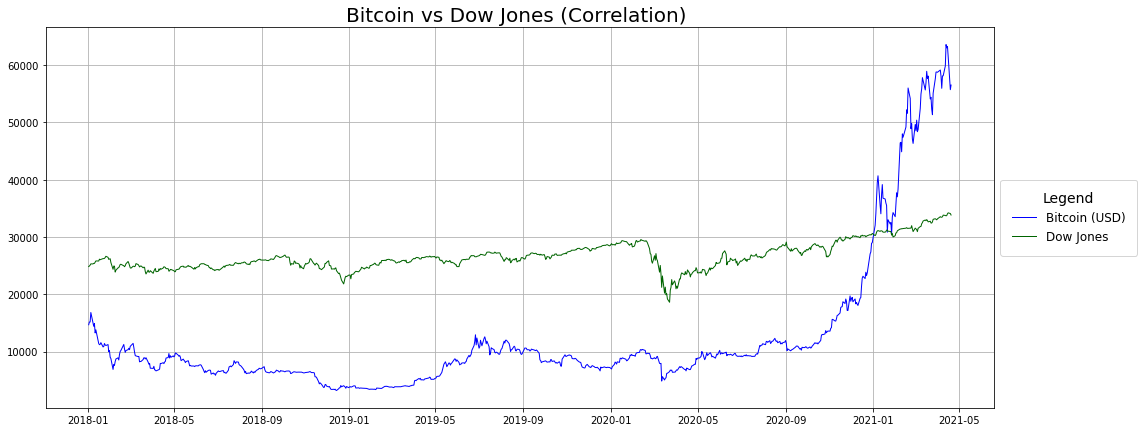

In [5]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Bitcoin'].values.tolist(),marker='', color='blue', linewidth=1, label="Bitcoin (USD)")
plt.plot( df.index.tolist(), df['Dow Jones'].values.tolist(), marker='', color='darkgreen', linewidth=1, label="Dow Jones")


plt.legend(
          title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)

plt.title("Bitcoin vs Dow Jones (Correlation) ", size=20)
plt.show()

In [6]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm') 

,Bitcoin,Gold,Dow Jones
Bitcoin,1.000000,0.486900,0.783931
Gold,0.486900,1.000000,0.553281
Dow Jones,0.783931,0.553281,1.000000
